In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.0.3'

#### Reading JSON

In [ ]:
# JSON (JavaScript Object Notation) is a standardized and language-independent format.



> https://andybek.com/pandas-folks-json



In [ ]:
folks = pd.read_json('https://andybek.com/pandas-folks-json')

In [ ]:
folks

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [ ]:
type(folks)

pandas.core.frame.DataFrame

In [ ]:
folks.iloc[2]

name                Mark Prescott
salary                      76400
occupation    Business Consultant
Name: 2, dtype: object

In [ ]:
folks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        4 non-null      object
 1   salary      4 non-null      int64 
 2   occupation  4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


#### Reading HTML

In [ ]:
# Hypertext Markup Language

In [ ]:
# Q: put together a dataframe of European countries and their populations

In [ ]:
data_url = 'https://en.wikipedia.org/wiki/List_of_European_countries_by_population'

In [ ]:
countries = pd.read_html(data_url, header=1)

In [ ]:
type(countries)

list

In [ ]:
len(countries)

2

In [ ]:
countries[0].head()

,Rank[Note 1],Country(or dependent territory),UNestimate,Estimate,Date,Regionalgrouping,Source
0,1.0,Russia[Note 2],145982925.0,146877088,1 Jan 2018,EAEU,National Estimate[3]
1,2.0,Germany,83832481.0,82887000,30 Jun 2018,EU,National estimate[4]
2,3.0,Turkey,84311607.0,83154997,4 Feb 2020,NaN,National estimate[5]
3,4.0,France[Note 3],65241316.0,67076000,1 Mar 2020,EU,Monthly national estimate[6]
4,5.0,United Kingdom[Note 4],67842580.0,66435550,30 Jun 2017,NaN,National annual estimate [7]


In [ ]:
countries = countries[0].loc[:, ['Country(or dependent territory)', 'Estimate']]

In [ ]:
countries.head()

,Country(or dependent territory),Estimate
0,Russia[Note 2],146877088
1,Germany,82887000
2,Turkey,83154997
3,France[Note 3],67076000
4,United Kingdom[Note 4],66435550


In [ ]:
# renaming column labels
countries.rename({'Country(or dependent territory)':'Country'}, axis=1, inplace=True)

In [ ]:
# removing [Note x]
countries.replace(r'\[Note \d+\]', '', regex=True, inplace=True)

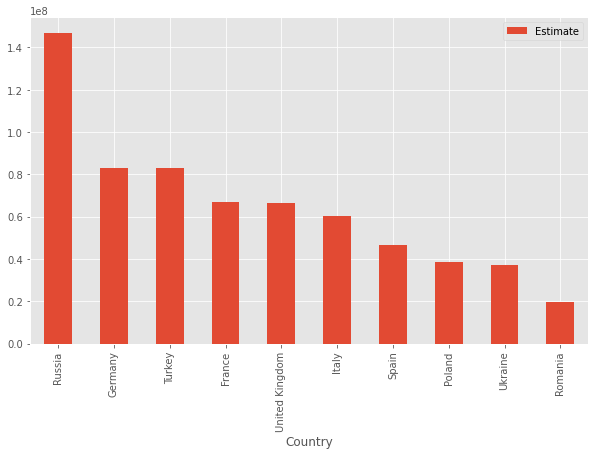

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
countries.set_index('Country').iloc[:10].plot(kind='bar', figsize=(10,6));

#### Reading Excel

Popular Excel Formats

*   .xls  -> binary format
*   .xlsx -> xml-based, available in newer versions

> https://andybek.com/folks.xlsx



In [ ]:
# read_excel()

In [ ]:
pd.read_excel('https://andybek.com/folks.xlsx')

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


In [ ]:
pd.read_excel('https://andybek.com/folks.xlsx', sheet_name='hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [ ]:
pd.read_excel('https://andybek.com/folks.xlsx', 'hobbies')

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [ ]:
pd.read_excel('https://andybek.com/folks.xlsx', 1)

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [ ]:
!pip show xlrd

Name: xlrd
Version: 1.1.0
Summary: Library for developers to extract data from Microsoft Excel (tm) spreadsheet files
Home-page: http://www.python-excel.org/
Author: John Machin
Author-email: sjmachin@lexicon.net
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: 


In [ ]:
!pip show openpyxl

Name: openpyxl
Version: 2.5.9
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT/Expat
Location: /usr/local/lib/python3.6/dist-packages
Requires: jdcal, et-xmlfile
Required-by: 


In [ ]:
!pip install xlrd openpyxl

#### Creating Output: The to_* Family Of Methods

In [ ]:
# I/O -> Input/Output

In [ ]:
# read_{format}

In [ ]:
hobbies = pd.read_excel('https://andybek.com/folks.xlsx', 'hobbies')

In [ ]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing


In [ ]:
# tasks:
# - add a new person to the hobbies dataframe
# - save the resulting df to a csv

In [ ]:
hobbies.loc[4] = ['Zoltan Zachary', 'Archery']

In [ ]:
hobbies

,name,hobby
0,Brian Dogood,Fishing
1,Leah Bokeh,Skateboarding
2,Mark Prescott,Value Investing
3,Jurgen Gupta,Drawing
4,Zoltan Zachary,Archery


In [ ]:
hobbies['age'] = np.random.uniform(22, 54, 5)

In [ ]:
hobbies

,name,hobby,age
0,Brian Dogood,Fishing,39.161933
1,Leah Bokeh,Skateboarding,27.673727
2,Mark Prescott,Value Investing,32.423339
3,Jurgen Gupta,Drawing,38.649495
4,Zoltan Zachary,Archery,53.905870


In [ ]:
# read_csv, read_excel, read_html...

In [ ]:
# to_csv, to_excel, to_html...

In [ ]:
hobbies.to_csv()

',name,hobby,age\n0,Brian Dogood,Fishing,39.16193309047951\n1,Leah Bokeh,Skateboarding,27.67372676797032\n2,Mark Prescott,Value Investing,32.42333944335808\n3,Jurgen Gupta,Drawing,38.64949532502015\n4,Zoltan Zachary,Archery,53.90586957632077\n'

In [ ]:
hobbies.to_csv('hobbies.csv', index=False)

In [ ]:
!ls

hobbies.csv  hobbies.json


In [ ]:
!rm sample_data -rf

In [ ]:
!ls

hobbies.csv  hobbies.json


In [ ]:
pd.read_csv('hobbies.csv')

,name,hobby,age
0,Brian Dogood,Fishing,39.161933
1,Leah Bokeh,Skateboarding,27.673727
2,Mark Prescott,Value Investing,32.423339
3,Jurgen Gupta,Drawing,38.649495
4,Zoltan Zachary,Archery,53.905870


In [ ]:
# how about json?

In [ ]:
hobbies.to_json()

'{"name":{"0":"Brian Dogood","1":"Leah Bokeh","2":"Mark Prescott","3":"Jurgen Gupta","4":"Zoltan Zachary"},"hobby":{"0":"Fishing","1":"Skateboarding","2":"Value Investing","3":"Drawing","4":"Archery"},"age":{"0":39.1619330905,"1":27.673726768,"2":32.4233394434,"3":38.649495325,"4":53.9058695763}}'

In [ ]:
hobbies.to_json('hobbies.json')

In [ ]:
!ls

hobbies.csv  hobbies.json


In [ ]:
# we could also do html!

In [ ]:
hobbies.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>name</th>\n      <th>hobby</th>\n      <th>age</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Brian Dogood</td>\n      <td>Fishing</td>\n      <td>39.161933</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Leah Bokeh</td>\n      <td>Skateboarding</td>\n      <td>27.673727</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mark Prescott</td>\n      <td>Value Investing</td>\n      <td>32.423339</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Jurgen Gupta</td>\n      <td>Drawing</td>\n      <td>38.649495</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Zoltan Zachary</td>\n      <td>Archery</td>\n      <td>53.905870</td>\n    </tr>\n  </tbody>\n</table>'

In [ ]:
print(hobbies.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>hobby</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Brian Dogood</td>
      <td>Fishing</td>
      <td>39.161933</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Leah Bokeh</td>
      <td>Skateboarding</td>
      <td>27.673727</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Mark Prescott</td>
      <td>Value Investing</td>
      <td>32.423339</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Jurgen Gupta</td>
      <td>Drawing</td>
      <td>38.649495</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Zoltan Zachary</td>
      <td>Archery</td>
      <td>53.905870</td>
    </tr>
  </tbody>
</table>


#### BONUS: Introduction To Pickling

###### **serialization**: the process of converting an object into a stream of bytes, to be stored or transmitted over a network

##### **pickle**: the python standard library module responsible for serialization



###### **serialization** 

serialization is also known as marshalling or flattening in other programming languages

###### _

In [ ]:
googl = {'ticker': 'GOOGL', 'shares': 10, 'book_cost': 1540.23}

In [ ]:
import pickle

In [ ]:
pickle_output = open('my_stock', 'wb')

In [ ]:
pickle.dump(googl, pickle_output)

In [ ]:
pickle_output.close()

In [ ]:
!ls

hobbies.csv  hobbies.json  my_stock


In [ ]:
!hexdump my_stock

0000000 0380 717d 2800 0658 0000 7400 6369 656b
0000010 7172 5801 0005 0000 4f47 474f 714c 5802
0000020 0006 0000 6873 7261 7365 0371 0a4b 0958
0000030 0000 6200 6f6f 5f6b 6f63 7473 0471 4047
0000040 1098 85eb b81e 7552 002e               
0000049


In [ ]:
pickle_input = open('my_stock', 'rb')

In [ ]:
stock_dict = pickle.load(pickle_input)

In [ ]:
stock_dict

{'book_cost': 1540.23, 'shares': 10, 'ticker': 'GOOGL'}

#### Pickles In Pandas



> https://andybek.com/portfolio



###### Some important notes

* pickles from untrusted sources may pose a security concern!
* for data-interchange over the web or across language stacks, JSON may be a better data interchange format

###### _

In [ ]:
folio = pd.read_pickle('https://andybek.com/portfolio')

In [ ]:
folio

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


In [ ]:
folio.to_pickle('folio')

In [ ]:
!ls

folio  hobbies.csv  hobbies.json  my_stock


In [ ]:
pd.read_pickle('folio')

,ticker,shares,book_cost
0,AAPL,150,123.23
1,GOOGL,10,1100.00
2,AMGN,230,227.23
3,VET,200,14.24
4,TSLA,100,260.00
5,DX,40,20.01


#### The Many Other Formats

In [ ]:
# there's many more!

#### Skill Challenge

##### **1**. 

###### If you head over to https://andybek.com/traders/ you'll find page listing trader positions and some attributes. Using pandas, read this table directly into a pandas dataframe. Assign the dataframe to the variable *positions*.

##### **2**.

###### The positions we imported in the step above contain trader aliases. Over at https://andybek.com/pandas-traders-names we have more information on the name and seniority of each trader.

What is the data format served at this url? Read it into a pandas dataframe called *traders*.

##### **3**.

Combine the two dataframes from the previous steps into a dataframe that combines positions with the full name and senority of each trader.

##### **4**.

Save the merged dataframe from the previous step into a pickle file called *pickled_positions* as well as a csv file called *positions.csv*.

Confirm that the files have been saved locally.

#### Solution

In [ ]:
# 1

In [ ]:
positions = pd.read_html('https://andybek.com/traders')[0]

In [ ]:
type(positions)

pandas.core.frame.DataFrame

In [ ]:
positions

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


In [ ]:
# 2

In [ ]:
traders = pd.read_json('https://andybek.com/pandas-traders-names')

In [ ]:
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


In [ ]:
# 3

In [ ]:
mrgd = positions.merge(traders, left_on='TraderID', right_on='alias').drop('alias', axis=1)

In [ ]:
# 4

In [ ]:
mrgd

,TraderID,Instrument,Amount,Trader Location,names,seniority
0,MCBIRN,02079K107,150000,EU,Shylah McBirney,Executive
1,WISEA,1350Z74U5,6400000,EU,Allen Wise,Executive
2,IACOP,GB00B3KJDQ49,2430000,US,Iacopo Brivio,Junior


In [ ]:
mrgd.to_pickle('pickled_traders')

In [ ]:
!ls

folio  hobbies.csv  hobbies.json  my_stock  pickled_traders


In [ ]:
mrgd.to_csv('traders.csv')

In [ ]:
!ls

folio  hobbies.csv  hobbies.json  my_stock  pickled_traders  traders.csv


In [ ]:
# bonus: how to download files from colab

In [ ]:
from google.colab import files

In [ ]:
files.download('traders.csv')